In [1]:
import pandas as pd
df_e = pd.read_csv('./data/gr_e.csv')
df_q = pd.read_csv('./data/gr_q.csv')

In [71]:
gr_df = pd.read_csv("./data/gr.csv")
br_df = pd.read_csv("./data/br.csv")

In [2]:
df_e['Timestamp'] = pd.to_datetime(df_e['Timestamp'], format="%Y/%m/%d %H:%M")
df_q['Timestamp'] = pd.to_datetime(df_q['Timestamp'], format="%Y/%m/%d %H:%M")

In [3]:
df = pd.merge(df_e, df_q, on='Timestamp', how='outer')
df = df.sort_values('Timestamp').reset_index(drop=True)

In [4]:
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis = 1)
df = df.dropna()

In [5]:
column_rename_map = {
    'Gill Rain mm Tot': 'Rain_mm',
    'Gill TotalDailyRain mm': 'DailyRain_mm',
    'Gill TotalRain mm': 'TotalRain_mm',
    'Gill Ws Mean': 'WindSpeed_mean',

    'EXO ChlugL': 'Chlorophyll_ugL',
    'EXO Depthm': 'Depth_m',
    'EXO DOmgL': 'DissolvedOxygen_mgL',
    'EXO DOPerSat': 'DO_Saturation_percent',
    'EXO pH': 'pH',
    'EXO Salpsu': 'Salinity_psu',
    'EXO SpCondmScm': 'Conductivity_mScm',
    'EXO TempC': 'Temperature_C',
    'EXO TurbNTU': 'Turbidity_NTU'
}

df = df.rename(columns=column_rename_map)


In [6]:
df = df.drop(['TotalRain_mm'],axis = 1)

In [7]:
df = df.reset_index(drop=True)

In [8]:
df = df.drop_duplicates()

In [9]:
df

,Timestamp,Rain_mm,DailyRain_mm,WindSpeed_mean,Chlorophyll_ugL,Depth_m,DissolvedOxygen_mgL,DO_Saturation_percent,pH,Salinity_psu,Conductivity_mScm,Temperature_C,Turbidity_NTU
0,2024-12-26 00:00:00,0.0,100.80,0.739,3.24,0.379,2.74,38.69,7.40,12.92,21.648,29.620,4.54
1,2024-12-26 00:10:00,0.0,0.00,0.883,3.28,0.380,2.73,38.45,7.39,12.54,21.065,29.595,4.67
2,2024-12-26 00:20:00,0.0,0.00,0.710,3.35,0.378,2.72,38.22,7.38,12.38,20.819,29.592,4.89
3,2024-12-26 00:30:00,0.0,0.00,0.547,3.26,0.378,2.71,38.04,7.38,12.04,20.296,29.632,4.90
4,2024-12-26 00:40:00,0.0,0.00,0.653,3.39,0.376,2.70,37.87,7.36,11.72,19.791,29.609,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10539,2025-03-18 11:10:00,0.0,79.92,2.811,3.21,0.267,3.66,49.75,7.76,14.00,23.232,27.010,5.85
10540,2025-03-18 11:20:00,0.0,79.92,2.902,3.45,0.274,3.66,49.65,7.76,13.98,23.194,27.015,5.80
10541,2025-03-18 11:30:00,0.0,79.92,2.035,3.06,0.271,3.77,51.48,7.81,14.87,24.540,27.007,5.35
10542,2025-03-18 11:40:00,0.0,79.92,2.228,3.13,0.272,3.71,50.57,7.80,14.57,24.089,27.034,6.49


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10346 entries, 0 to 10543
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              10346 non-null  datetime64[ns]
 1   Rain_mm                10346 non-null  float64       
 2   DailyRain_mm           10346 non-null  float64       
 3   WindSpeed_mean         10346 non-null  float64       
 4   Chlorophyll_ugL        10346 non-null  float64       
 5   Depth_m                10346 non-null  float64       
 6   DissolvedOxygen_mgL    10346 non-null  float64       
 7   DO_Saturation_percent  10346 non-null  float64       
 8   pH                     10346 non-null  float64       
 9   Salinity_psu           10346 non-null  float64       
 10  Conductivity_mScm      10346 non-null  float64       
 11  Temperature_C          10346 non-null  float64       
 12  Turbidity_NTU          10346 non-null  float64       
dtypes: dat

In [11]:
df.to_csv('./data/gr_final.csv')

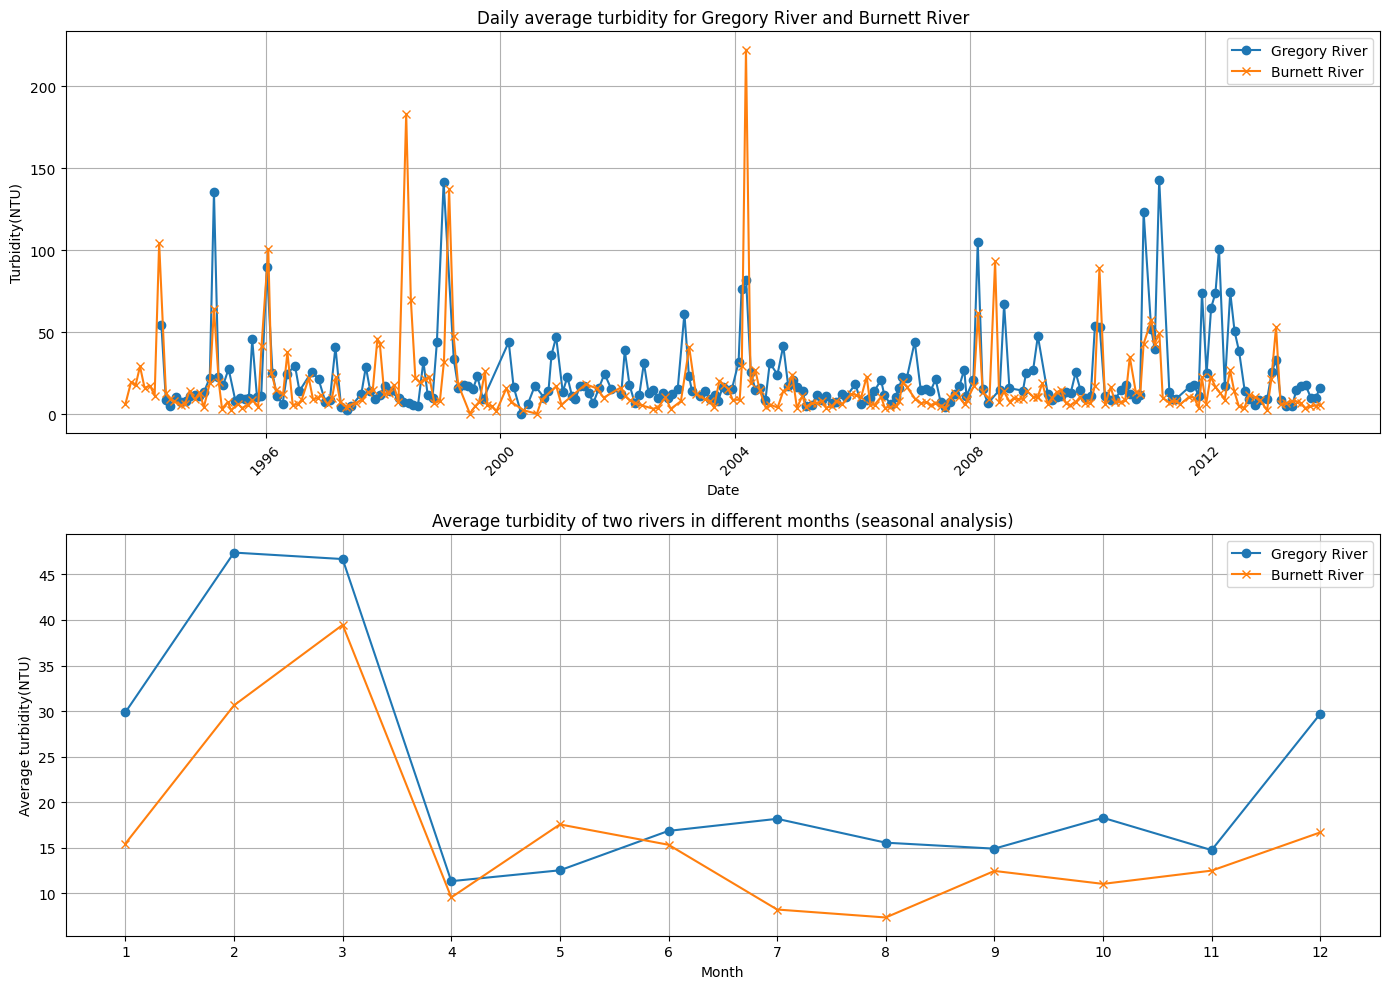

In [81]:
# 将日期字段转换为 datetime 类型，并处理缺失值
gr_df["SURVEY_DATE"] = pd.to_datetime(gr_df["SURVEY_DATE"], dayfirst=True, errors='coerce')
gr_df = gr_df.dropna(subset=["SURVEY_DATE", "Turbidity (NTU)"])

# 按日期计算每日平均浊度
gr_daily_turbidity = gr_df.groupby("SURVEY_DATE")["Turbidity (NTU)"].mean().reset_index()

# 处理 br.csv 的日期和浊度数据
br_df["SURVEY_DATE"] = pd.to_datetime(br_df["SURVEY_DATE"], dayfirst=True, errors='coerce')
br_df = br_df.dropna(subset=["SURVEY_DATE", "Turbidity (NTU)"])

# 按日期计算每日平均浊度
br_daily_turbidity = br_df.groupby("SURVEY_DATE")["Turbidity (NTU)"].mean().reset_index()

# 绘图：与 gr 数据集进行对比
plt.figure(figsize=(14, 10))
plt.subplot(2,1,1)
plt.plot(gr_daily_turbidity["SURVEY_DATE"], gr_daily_turbidity["Turbidity (NTU)"], label="Gregory River", marker='o')
plt.plot(br_daily_turbidity["SURVEY_DATE"], br_daily_turbidity["Turbidity (NTU)"], label="Burnett River", marker='x')
plt.title("Daily average turbidity for Gregory River and Burnett River")
plt.xlabel("Date")
plt.ylabel('Turbidity(NTU)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)


# 提取 GR 与 BR 的“月份”字段
gr_df["Month"] = gr_df["SURVEY_DATE"].dt.month
br_df["Month"] = br_df["SURVEY_DATE"].dt.month

# 按月份计算平均浊度
gr_monthly_avg = gr_df.groupby("Month")["Turbidity (NTU)"].mean().reset_index()
br_monthly_avg = br_df.groupby("Month")["Turbidity (NTU)"].mean().reset_index()

# 画图：两数据集的月平均浊度变化对比
plt.subplot(2,1,2)
plt.plot(gr_monthly_avg["Month"], gr_monthly_avg["Turbidity (NTU)"], label="Gregory River", marker='o')
plt.plot(br_monthly_avg["Month"], br_monthly_avg["Turbidity (NTU)"], label="Burnett River", marker='x')
plt.title("Average turbidity of two rivers in different months (seasonal analysis)")
plt.xlabel("Month")
plt.ylabel("Average turbidity(NTU)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

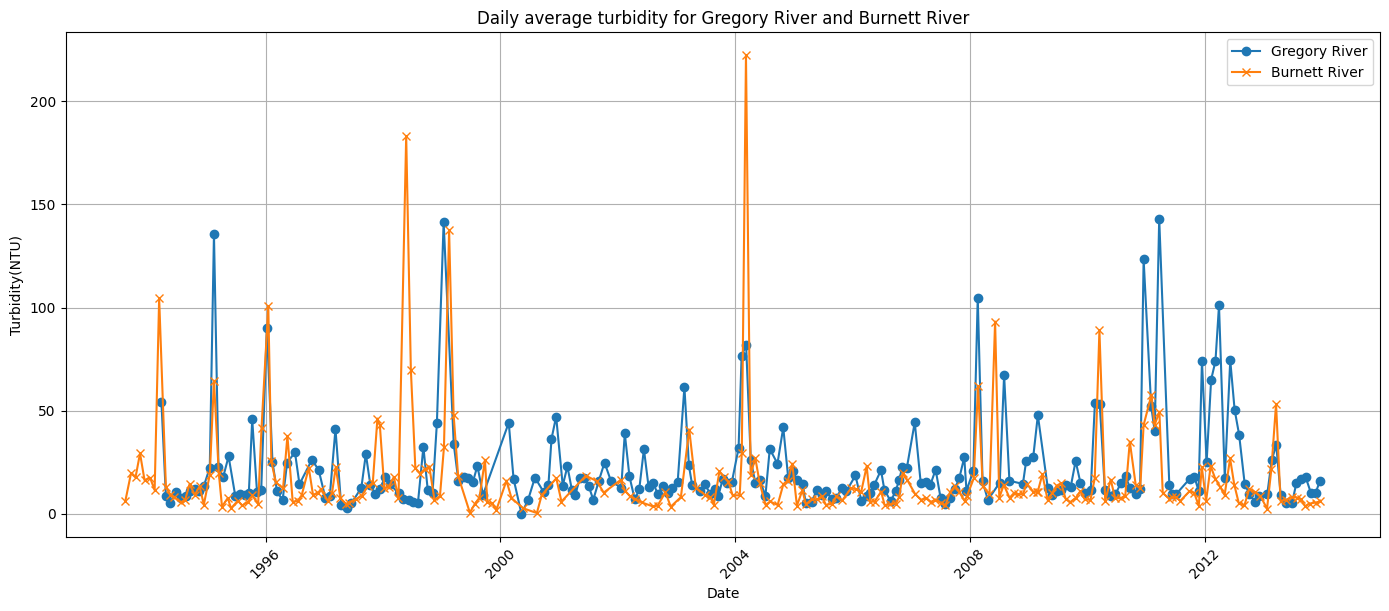

In [75]:
# 将日期字段转换为 datetime 类型，并处理缺失值
gr_df["SURVEY_DATE"] = pd.to_datetime(gr_df["SURVEY_DATE"], dayfirst=True, errors='coerce')
gr_df = gr_df.dropna(subset=["SURVEY_DATE", "Turbidity (NTU)"])

# 按日期计算每日平均浊度
gr_daily_turbidity = gr_df.groupby("SURVEY_DATE")["Turbidity (NTU)"].mean().reset_index()

# 处理 br.csv 的日期和浊度数据
br_df["SURVEY_DATE"] = pd.to_datetime(br_df["SURVEY_DATE"], dayfirst=True, errors='coerce')
br_df = br_df.dropna(subset=["SURVEY_DATE", "Turbidity (NTU)"])

# 按日期计算每日平均浊度
br_daily_turbidity = br_df.groupby("SURVEY_DATE")["Turbidity (NTU)"].mean().reset_index()

# 绘图：与 gr 数据集进行对比
plt.figure(figsize=(14, 6))
plt.plot(gr_daily_turbidity["SURVEY_DATE"], gr_daily_turbidity["Turbidity (NTU)"], label="Gregory River", marker='o')
plt.plot(br_daily_turbidity["SURVEY_DATE"], br_daily_turbidity["Turbidity (NTU)"], label="Burnett River", marker='x')
plt.title("Daily average turbidity for Gregory River and Burnett River")
plt.xlabel("Date")
plt.ylabel('Turbidity(NTU)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

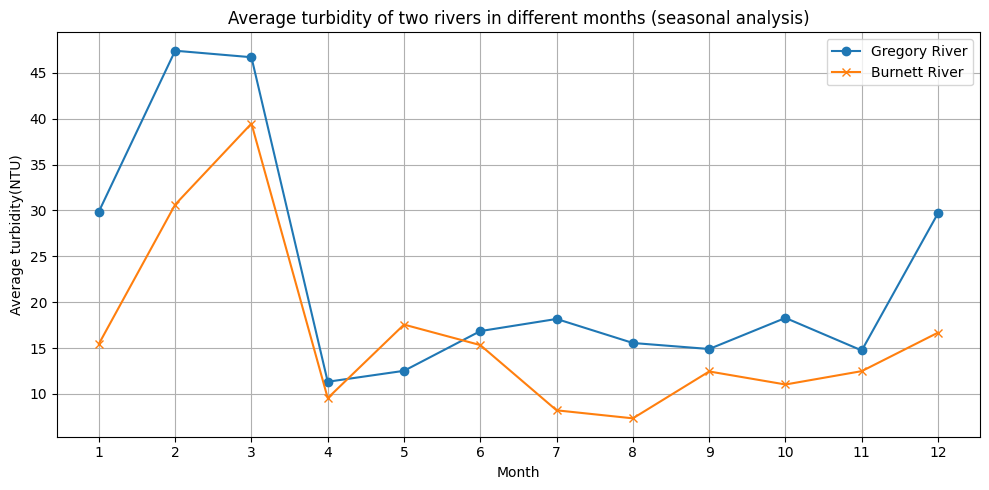

In [77]:
# 提取 GR 与 BR 的“月份”字段
gr_df["Month"] = gr_df["SURVEY_DATE"].dt.month
br_df["Month"] = br_df["SURVEY_DATE"].dt.month

# 按月份计算平均浊度
gr_monthly_avg = gr_df.groupby("Month")["Turbidity (NTU)"].mean().reset_index()
br_monthly_avg = br_df.groupby("Month")["Turbidity (NTU)"].mean().reset_index()

# 画图：两数据集的月平均浊度变化对比
plt.figure(figsize=(10, 5))
plt.plot(gr_monthly_avg["Month"], gr_monthly_avg["Turbidity (NTU)"], label="Gregory River", marker='o')
plt.plot(br_monthly_avg["Month"], br_monthly_avg["Turbidity (NTU)"], label="Burnett River", marker='x')
plt.title("Average turbidity of two rivers in different months")
plt.xlabel("Month")
plt.ylabel("Average turbidity(NTU)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
gr = pd.read_csv('./data/gr.csv')
br = pd.read_csv('./data/br.csv')

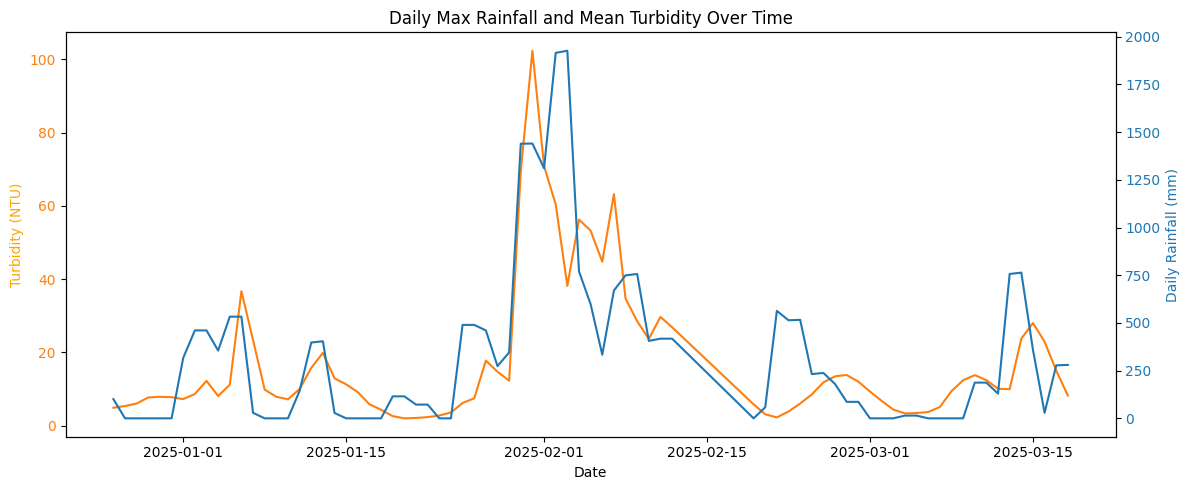

In [83]:
df_daily = df.resample('D', on='Timestamp').agg({
    'DailyRain_mm': 'max',
    'Turbidity_NTU': 'mean'
}).dropna()

# 绘制双轴时间序列图
fig, ax1 = plt.subplots(figsize=(12, 5))

# 左轴：浊度
ax1.plot(df_daily.index, df_daily['Turbidity_NTU'], color='tab:orange', label='Turbidity (NTU)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Turbidity (NTU)', color='orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# 右轴：降雨
ax2 = ax1.twinx()
ax2.plot(df_daily.index, df_daily['DailyRain_mm'], color='tab:blue', label='Daily Rainfall (mm)')
ax2.set_ylabel('Daily Rainfall (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# 标题
plt.title('Daily Max Rainfall and Mean Turbidity Over Time')
fig.tight_layout()
plt.show()

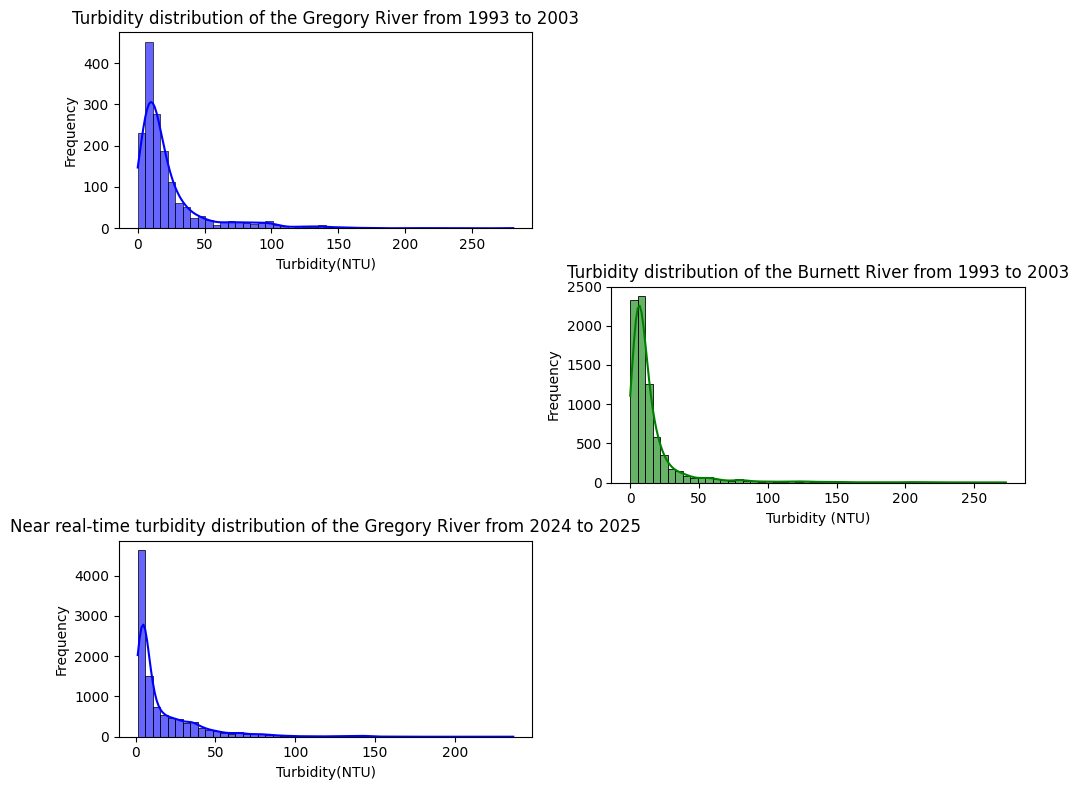

In [50]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
sns.histplot(gr['Turbidity (NTU)'], kde=True, bins=50, color="blue", alpha=0.6)
plt.xlabel("Turbidity(NTU)")
plt.ylabel("Frequency")
plt.title("Turbidity distribution of the Gregory River from 1993 to 2003")
plt.tight_layout()
plt.subplot(3,2,4)
br=br.loc[br['Turbidity (NTU)'] < 280]
sns.histplot(br['Turbidity (NTU)'], kde=True, bins=50, color="green", alpha=0.6)
plt.xlabel('Turbidity (NTU)')
plt.ylabel("Frequency")
plt.title("Turbidity distribution of the Burnett River from 1993 to 2003")
plt.tight_layout()
plt.subplot(3,2,5)
sns.histplot(df['Turbidity_NTU'], kde=True, bins=50, color="blue", alpha=0.6)
plt.xlabel("Turbidity(NTU)")
plt.ylabel("Frequency")
plt.title("Near real-time turbidity distribution of the Gregory River from 2024 to 2025")
plt.tight_layout()
plt.show()

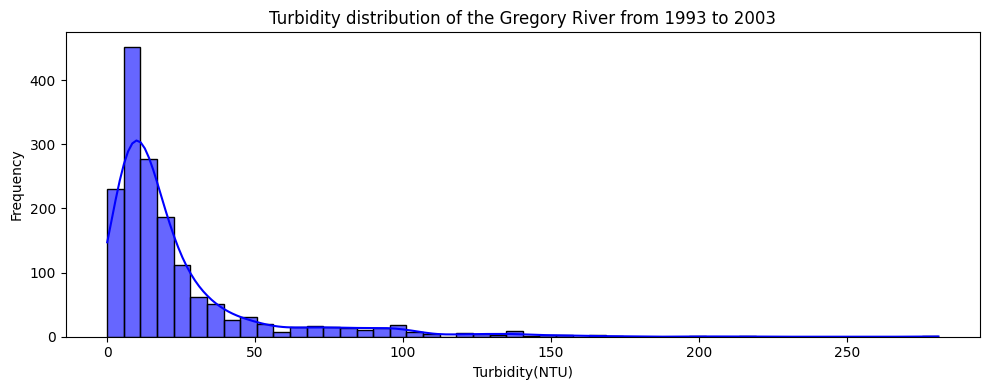

In [24]:
plt.figure(figsize=(10, 4))
sns.histplot(gr['Turbidity (NTU)'], kde=True, bins=50, color="blue", alpha=0.6)
plt.xlabel("Turbidity(NTU)")
plt.ylabel("Frequency")
plt.title("Turbidity distribution of the Gregory River from 1993 to 2003")
plt.tight_layout()
plt.show()

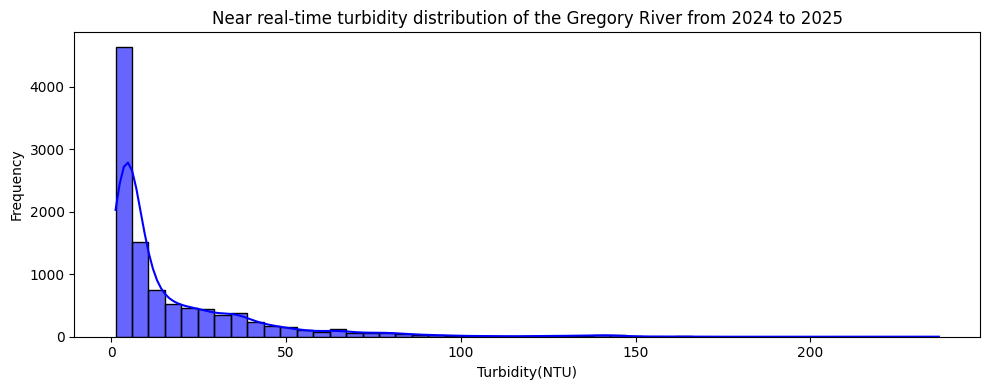

In [23]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Turbidity_NTU'], kde=True, bins=50, color="blue", alpha=0.6)
plt.xlabel("Turbidity(NTU)")
plt.ylabel("Frequency")
plt.title("Near real-time turbidity distribution of the Gregory River from 2024 to 2025")
plt.tight_layout()
plt.show()

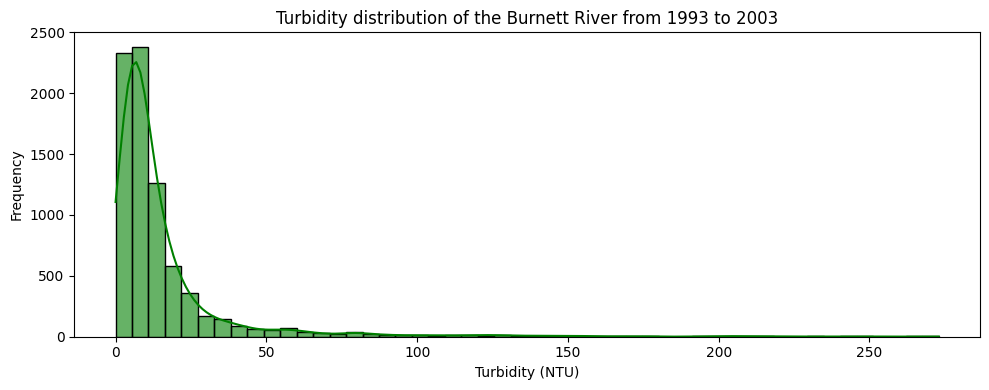

In [25]:
br=br.loc[br['Turbidity (NTU)'] < 280]
plt.figure(figsize=(10, 4))
sns.histplot(br['Turbidity (NTU)'], kde=True, bins=50, color="green", alpha=0.6)
plt.xlabel('Turbidity (NTU)')
plt.ylabel("Frequency")
plt.title("Turbidity distribution of the Burnett River from 1993 to 2003")
plt.tight_layout()
plt.show()

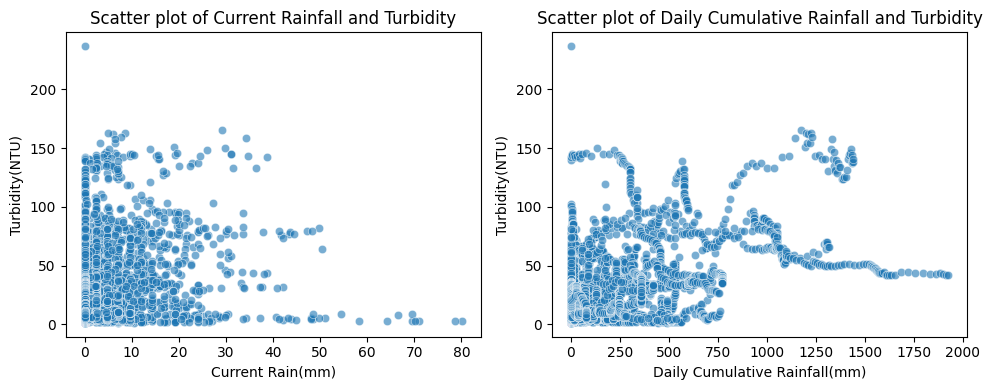

In [82]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="Rain_mm", y="Turbidity_NTU", alpha=0.6)
plt.title("Scatter plot of Current Rainfall and Turbidity")
plt.xlabel("Current Rain(mm)")
plt.ylabel("Turbidity(NTU)")
plt.tight_layout()
plt.subplot(1,2,2)
sns.scatterplot(data=df, x="DailyRain_mm", y="Turbidity_NTU", alpha=0.6)
plt.title("Scatter plot of Daily Cumulative Rainfall and Turbidity")
plt.xlabel("Daily Cumulative Rainfall(mm)")
plt.ylabel("Turbidity(NTU)")
plt.tight_layout()
plt.show()

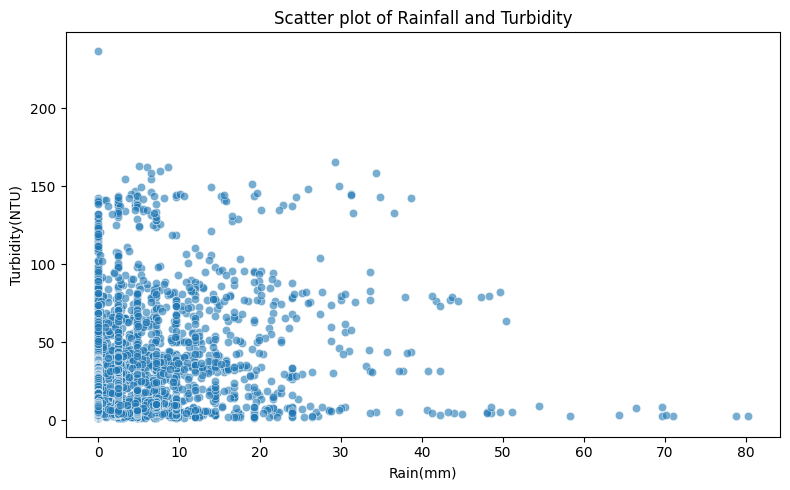

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Rain_mm", y="Turbidity_NTU", alpha=0.6)
plt.title("Scatter plot of Rainfall and Turbidity")
plt.xlabel("Rain(mm)")
plt.ylabel("Turbidity(NTU)")
plt.tight_layout()
plt.show()

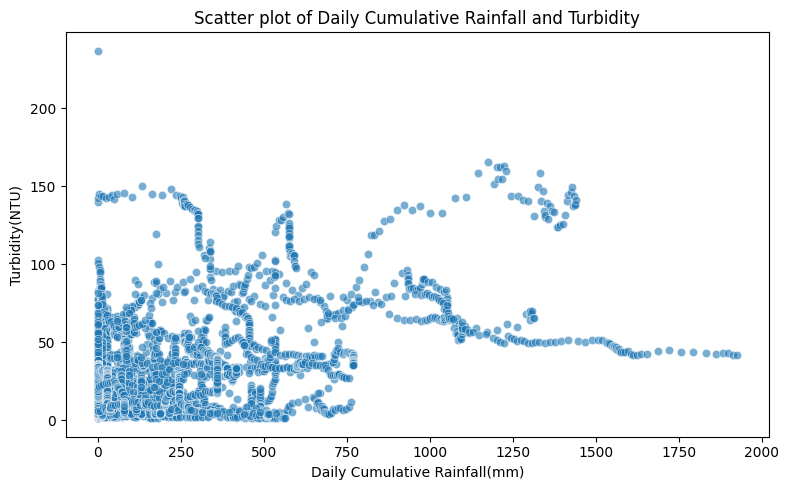

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="DailyRain_mm", y="Turbidity_NTU", alpha=0.6)
plt.title("Scatter plot of Daily Cumulative Rainfall and Turbidity")
plt.xlabel("Daily Cumulative Rainfall(mm)")
plt.ylabel("Turbidity(NTU)")
plt.tight_layout()
plt.show()

In [ ]:
df_daily = df.resample('D', on='Timestamp').agg({
    'DailyRain_mm': 'max',
    'Turbidity_NTU': 'mean'
}).dropna()

# 绘制双轴时间序列图
fig, ax1 = plt.subplots(figsize=(12, 5))

# 左轴：浊度
ax1.plot(df_daily.index, df_daily['Turbidity_NTU'], color='tab:orange', label='Turbidity (NTU)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Turbidity (NTU)', color='orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# 右轴：降雨
ax2 = ax1.twinx()
ax2.plot(df_daily.index, df_daily['DailyRain_mm'], color='tab:blue', label='Daily Rainfall (mm)')
ax2.set_ylabel('Daily Rainfall (mm)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# 标题
plt.title('Daily Rainfall and Turbidity Over Time')
fig.tight_layout()
plt.show()

In [88]:
df_one = df.iloc[863:1007,:]
df_one

,Timestamp,Rain_mm,DailyRain_mm,WindSpeed_mean,Chlorophyll_ugL,Depth_m,DissolvedOxygen_mgL,DO_Saturation_percent,pH,Salinity_psu,Conductivity_mScm,Temperature_C,Turbidity_NTU
881,2025-01-01 00:00:00,0.0,0.000,0.496,4.39,0.331,4.09,62.75,7.60,24.73,39.087,30.776,3.23
882,2025-01-01 00:10:00,0.0,0.000,0.588,4.43,0.331,3.96,60.82,7.59,24.77,39.141,30.870,3.15
883,2025-01-01 00:20:00,0.0,0.000,0.449,4.16,0.328,3.87,59.18,7.58,24.16,38.266,30.801,2.78
884,2025-01-01 00:30:00,0.0,0.000,0.314,4.17,0.328,3.70,56.92,7.56,24.53,38.802,30.941,2.93
885,2025-01-01 00:40:00,0.0,0.000,0.504,4.08,0.324,3.66,56.17,7.55,24.33,38.522,30.944,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,2025-01-01 23:10:00,0.0,316.799,1.160,2.74,0.333,3.67,54.87,7.60,24.26,38.352,29.279,3.26
1024,2025-01-01 23:20:00,0.0,316.799,1.418,3.00,0.331,3.86,57.69,7.60,25.15,39.613,29.097,3.17
1025,2025-01-01 23:30:00,0.0,316.799,1.359,2.89,0.332,3.73,56.12,7.59,25.47,40.070,29.261,3.10
1026,2025-01-01 23:40:00,0.0,316.799,1.409,2.76,0.334,3.72,56.03,7.59,25.40,39.976,29.338,3.17


C:\Users\YJ\AppData\Local\Temp\ipykernel_16684\2803384988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_one["TimeHM"] = df_one["Timestamp"].dt.strftime("%H:%M")


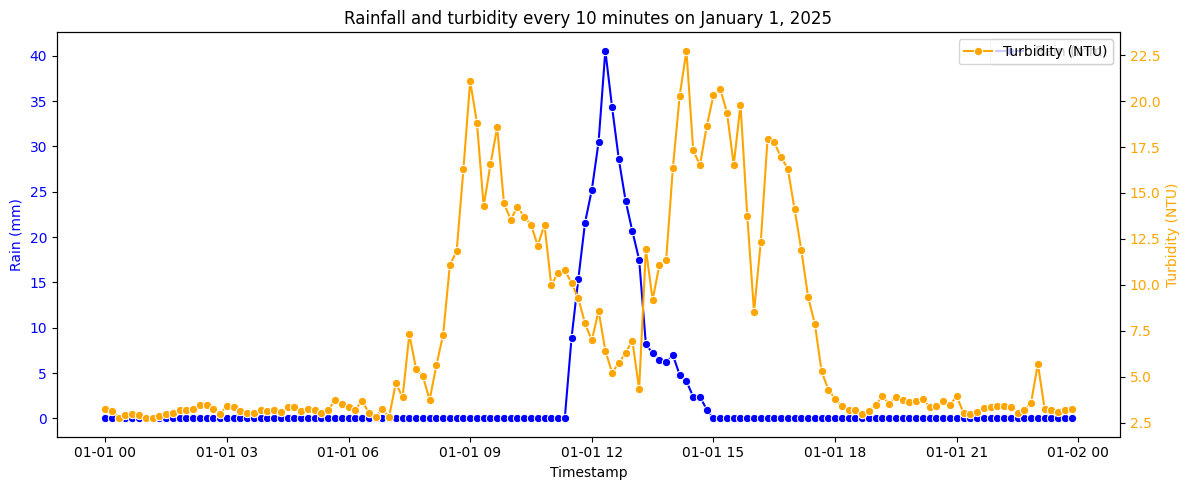

In [89]:
df_one["TimeHM"] = df_one["Timestamp"].dt.strftime("%H:%M")

plt.figure(figsize=(12, 5))
ax1 = plt.gca()  # 主轴，左侧降雨

# 左侧：降雨
sns.lineplot(data=df_one, x="Timestamp", y="Rain_mm", marker="o", ax=ax1, color="blue", label="Rain (mm)")
ax1.set_ylabel("Rain (mm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 创建右侧 y 轴
ax2 = ax1.twinx()

# 右侧：浊度
sns.lineplot(data=df_one, x="Timestamp", y="Turbidity_NTU", marker="o", ax=ax2, color="orange", label="Turbidity (NTU)")
ax2.set_ylabel("Turbidity (NTU)", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# x 轴
ax1.set_xlabel("Timestamp")

# 图标题
plt.title("Rainfall and turbidity every 10 minutes on January 1, 2025")
plt.tight_layout()
plt.show()

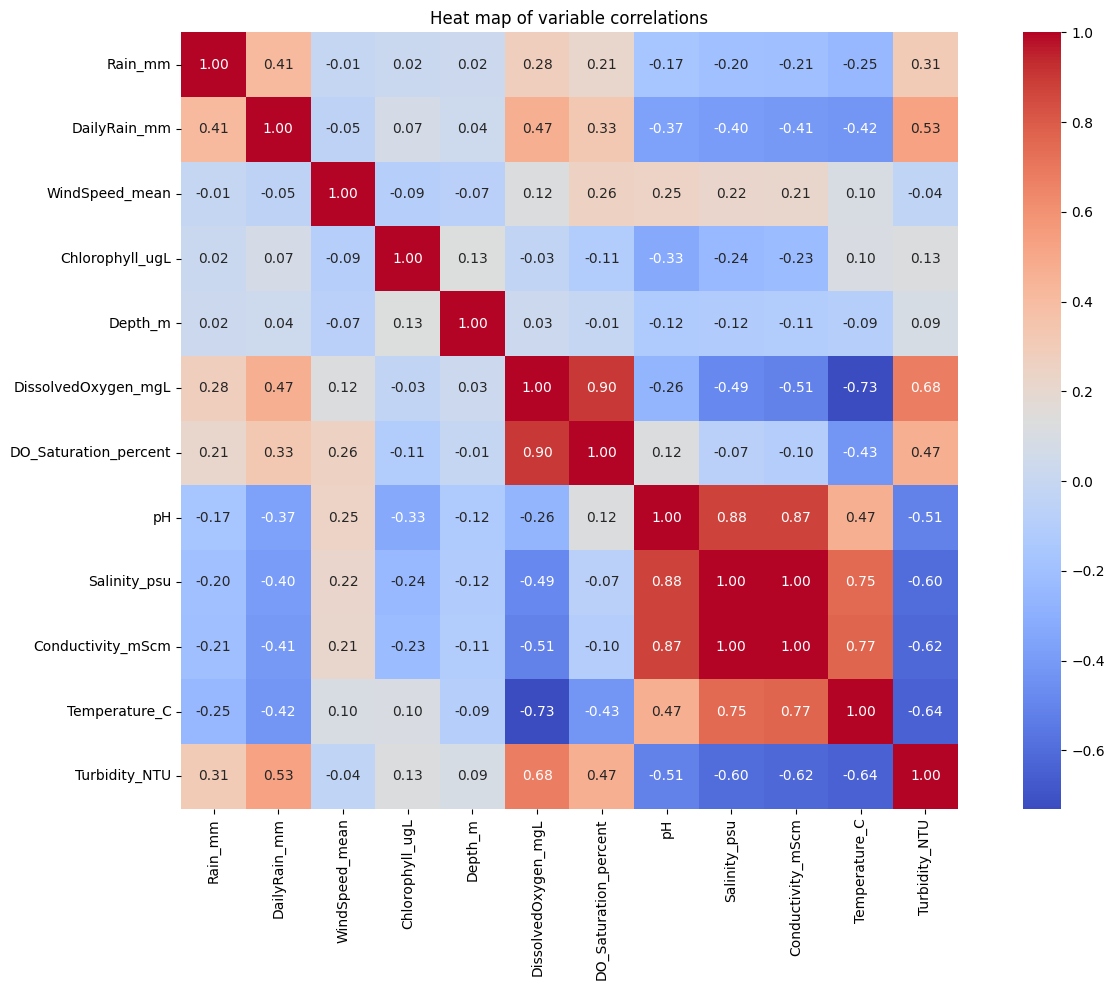

In [38]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heat map of variable correlations")
plt.tight_layout()
plt.show()